In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score



%matplotlib inline

## For the final project I am using a data set that I found in Kaggle called Countries of the World: https://www.kaggle.com/fernandol/countries-of-the-world
## It was created using US Government data by a Spanish data science student: Fernando ## Lasso
## It has statistics for many countries in the world. I just wanted to see whether GDP could 
## be predicted by the other numbers in the data set

In [80]:
countries = pd.read_csv('./data/countries.csv')

In [81]:
countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [82]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null object
Coastline (coast/area ratio)          227 non-null object
Net migration                         224 non-null object
Infant mortality (per 1000 births)    224 non-null object
GDP ($ per capita)                    226 non-null float64
Literacy (%)                          209 non-null object
Phones (per 1000)                     223 non-null object
Arable (%)                            225 non-null object
Crops (%)                             225 non-null object
Other (%)                             225 non-null object
Climate                               205 non-null object
Birthrate                 

## Most of the columns are not numeric
## There are many columns that have null values
## The values have commas instead of periods to denote decimals

In [83]:
new_countries = countries.copy()

# I will work from a copy of the countries dataframe

In [84]:
null_data = new_countries[new_countries.isnull().any(axis=1)]

In [85]:
null_data

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,"9,7","0,13",0,"191,19",1900.0,"42,0","7,8","2,41","0,24","97,35",NaN,"45,11","24,2","0,096","0,658","0,246"
25,Bosnia & Herzegovina,EASTERN EUROPE,4498976,51129,"88,0","0,04","0,31","21,05",6100.0,NaN,"215,4","13,6","2,96","83,44",4,"8,77","8,27","0,142","0,308","0,55"
36,Canada,NORTHERN AMERICA,33098932,9984670,"3,3","2,02","5,96","4,75",29800.0,"97,0","552,2","4,96","0,02","95,02",NaN,"10,78","7,8","0,022","0,294","0,684"
47,Cook Islands,OCEANIA,21388,240,"89,1","50,00",NaN,NaN,5000.0,"95,0","289,9","17,39","13,04","69,57",2,21,NaN,"0,151","0,096","0,753"
50,Croatia,EASTERN EUROPE,4494749,56542,"79,5","10,32","1,58","6,84",10600.0,"98,5","420,4","26,09","2,27","71,65",NaN,"9,61","11,48","0,07","0,308","0,622"
52,Cyprus,NEAR EAST,784301,9250,"84,8","7,01","0,43","7,18",19200.0,"97,6",NaN,"7,79","4,44","87,77",3,"12,56","7,68","0,037","0,198","0,765"
58,East Timor,ASIA (EX. NEAR EAST),1062777,15007,"70,8","4,70",0,"47,41",500.0,"58,6",NaN,"4,71","0,67","94,62",2,"26,99","6,24","0,085","0,231","0,684"
66,Faroe Islands,WESTERN EUROPE,47246,1399,"33,8","79,84","1,41","6,24",22000.0,NaN,"503,8","2,14",0,"97,86",NaN,"14,05","8,7","0,27","0,11","0,62"


# For this first model I will drop the null data

In [86]:
new_countries = new_countries.dropna()

In [87]:
new_countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 226
Data columns (total 20 columns):
Country                               179 non-null object
Region                                179 non-null object
Population                            179 non-null int64
Area (sq. mi.)                        179 non-null int64
Pop. Density (per sq. mi.)            179 non-null object
Coastline (coast/area ratio)          179 non-null object
Net migration                         179 non-null object
Infant mortality (per 1000 births)    179 non-null object
GDP ($ per capita)                    179 non-null float64
Literacy (%)                          179 non-null object
Phones (per 1000)                     179 non-null object
Arable (%)                            179 non-null object
Crops (%)                             179 non-null object
Other (%)                             179 non-null object
Climate                               179 non-null object
Birthrate                 

# The following function will enable me to convert non numeric columns to float64 objects
# It will change the commas to periods and then it will change the type 

In [88]:
def fix_column(x):
    new_countries[x] = new_countries[x].str.replace(',', '.')
    new_countries[x] = new_countries[x].astype(float)

In [89]:
new_countries.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [90]:
new_countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
6,Anguilla,LATIN AMER. & CARIB,13477,102,"132,1","59,80","10,76","21,03",8600.0,"95,0","460,0",0,0,100,2,"14,17","5,34","0,04","0,18","0,78"
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,"156,0","34,54","-6,15","19,46",11000.0,"89,0","549,9","18,18","4,55","77,27",2,"16,93","5,37","0,038","0,22","0,743"


In [91]:
new_countries_columns = ['Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)','Net migration', 'Infant mortality (per 1000 births)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service']

In [92]:
for column in new_countries_columns:
    fix_column(column)
    

In [93]:
new_countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 226
Data columns (total 20 columns):
Country                               179 non-null object
Region                                179 non-null object
Population                            179 non-null int64
Area (sq. mi.)                        179 non-null int64
Pop. Density (per sq. mi.)            179 non-null float64
Coastline (coast/area ratio)          179 non-null float64
Net migration                         179 non-null float64
Infant mortality (per 1000 births)    179 non-null float64
GDP ($ per capita)                    179 non-null float64
Literacy (%)                          179 non-null float64
Phones (per 1000)                     179 non-null float64
Arable (%)                            179 non-null float64
Crops (%)                             179 non-null float64
Other (%)                             179 non-null float64
Climate                               179 non-null float64
Birthrate       

In [94]:
new_countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743


## Now all relevant fields are either int64 or float64 and the decimals have periods

In [95]:
new_countries.corr()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Population,1.000000,0.610850,-0.019010,-0.054617,0.010332,0.002438,-0.033618,-0.038162,-0.003942,0.206667,-0.062567,-0.137345,-0.018471,-0.064719,-0.050578,-0.007401,0.092468,-0.070320
Area (sq. mi.),0.610850,1.000000,-0.069010,-0.088162,0.052730,0.002924,0.068356,0.000682,0.077864,-0.053747,-0.160433,0.124528,-0.094852,-0.037473,-0.024266,-0.017035,0.103225,-0.070204
Pop. Density (per sq. mi.),-0.019010,-0.069010,1.000000,0.164036,0.161705,-0.143214,0.190122,0.086090,0.157072,-0.059223,-0.036580,0.066753,-0.012370,-0.174565,-0.130624,-0.144315,-0.145370,0.255477
Coastline (coast/area ratio),-0.054617,-0.088162,0.164036,1.000000,-0.241629,-0.105956,0.035815,0.099605,0.098367,-0.077800,0.399358,-0.137085,-0.027063,-0.063464,-0.148592,-0.032327,-0.188972,0.190004
Net migration,0.010332,0.052730,0.161705,-0.241629,1.000000,0.013053,0.378790,-0.053788,0.232446,-0.065846,-0.405355,0.257420,-0.070413,-0.035102,0.042805,-0.096617,-0.004402,0.091498
Infant mortality (per 1000 births),0.002438,0.002924,-0.143214,-0.105956,0.013053,1.000000,-0.639090,-0.761224,-0.699199,-0.123033,-0.095712,0.148600,-0.366672,0.862113,0.665729,0.758537,-0.085310,-0.618259
GDP ($ per capita),-0.033618,0.068356,0.190122,0.035815,0.378790,-0.639090,1.000000,0.522880,0.883520,0.046465,-0.207844,0.066445,0.360567,-0.658795,-0.247562,-0.616919,0.032855,0.536551
Literacy (%),-0.038162,0.000682,0.086090,0.099605,-0.053788,-0.761224,0.522880,1.000000,0.592042,0.086519,0.060741,-0.101167,0.395194,-0.788349,-0.401696,-0.620514,0.105703,0.474395
Phones (per 1000),-0.003942,0.077864,0.157072,0.098367,0.232446,-0.699199,0.883520,0.592042,1.000000,0.124116,-0.124819,-0.038643,0.410691,-0.732985,-0.317530,-0.631578,-0.084247,0.649638
Arable (%),0.206667,-0.053747,-0.059223,-0.077800,-0.065846,-0.123033,0.046465,0.086519,0.124116,1.000000,0.098265,-0.866058,0.392914,-0.198438,0.047770,-0.018610,-0.073380,0.081982


# The following columns have a corr coefficient higher than 0.40 with regard to GDP 
## ['Infant mortality (per 1000 births)','Literacy (%)','Phones (per 1000)',
##     'Birthrate', 'Agriculture',  'Service'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a16079c88>,
      dtype=object)

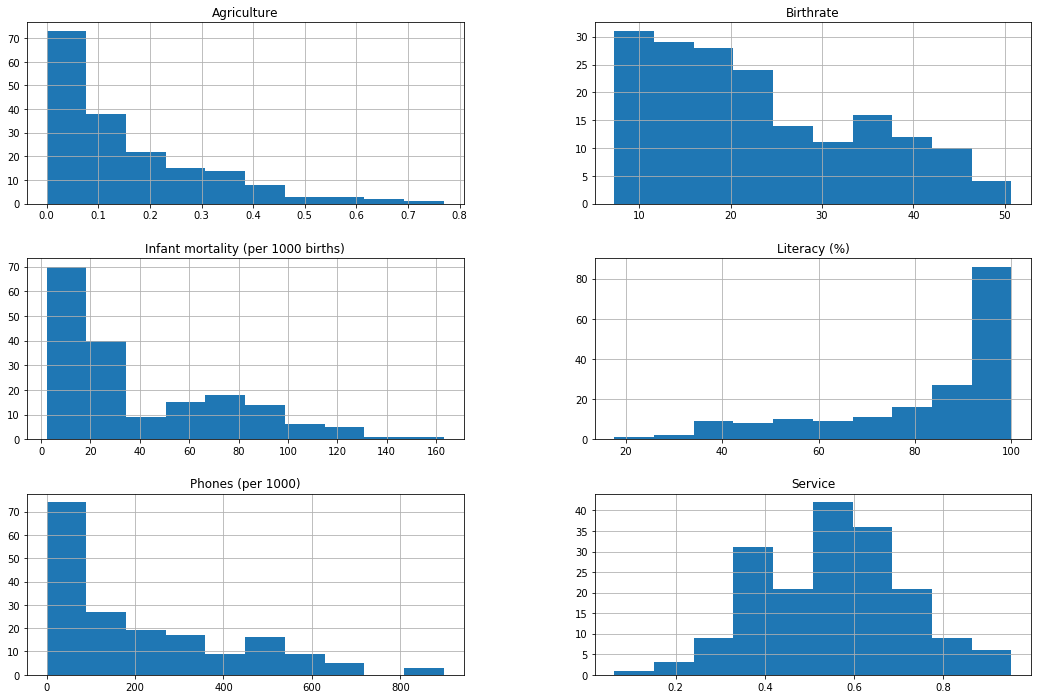

In [96]:
selected_cols = ['Infant mortality (per 1000 births)','Literacy (%)','Phones (per 1000)',
'Birthrate', 'Agriculture', 'Service']
new_countries[selected_cols].hist(figsize=(18,12))

## Some of these columns are skewed to the right. Others are skewed to the left
## Service appears to have a normal distribution

In [101]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

useful_cols = [ 'Birthrate', 'Infant mortality (per 1000 births)','Agriculture', 
 'Service', 'Literacy (%)']
selected_cols = ['Phones (per 1000)']

X = new_countries[selected_cols]
y = new_countries['GDP ($ per capita)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=12)
   
    
 

In [102]:
def train_test_rmse(df, feature_cols):
    X = df[feature_cols]
    y = df['GDP ($ per capita)']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=12)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    print("Train Data MSE: ", metrics.mean_squared_error(y_train, linreg.predict(X_train)))
    print("Test Data MSE:  ", metrics.mean_squared_error(y_test, y_pred))
        
    print("coefficient:  ",linreg.coef_)
    print("intercept:    ",linreg.intercept_)

    
    r2 = metrics.r2_score(y_test, y_pred)
 
    
    
    sns.jointplot(y_test, y_pred,color='g',kind="reg");
    
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

Selected Columns:  ['Phones (per 1000)']
Train Data MSE:  21622334.0546181
Test Data MSE:   17717535.63594498
coefficient:   [39.1661155]
intercept:     711.288866927739


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Selected Columns:  ['Phones (per 1000)', 'Birthrate']
Train Data MSE:  21521102.06683901
Test Data MSE:   17897043.709572278
coefficient:   [ 37.54854223 -40.6364928 ]
intercept:     2020.26385391441


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Selected Columns:  ['Phones (per 1000)', 'Birthrate', 'Infant mortality (per 1000 births)']
Train Data MSE:  21489393.909400105
Test Data MSE:   17779358.96269909
coefficient:   [ 37.34960416 -17.91343516  -9.27351309]
intercept:     1901.7736920144598


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Selected Columns:  ['Phones (per 1000)', 'Birthrate', 'Infant mortality (per 1000 births)', 'Agriculture']
Train Data MSE:  21163792.25201551
Test Data MSE:   16961846.428540353
coefficient:   [   36.83097238    -9.9949204      6.50532284 -6016.5545699 ]
intercept:     2145.4549709250596


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Selected Columns:  ['Phones (per 1000)', 'Birthrate', 'Infant mortality (per 1000 births)', 'Agriculture', 'Service']
Train Data MSE:  20571080.36493964
Test Data MSE:   16207489.277351905
coefficient:   [ 3.92703791e+01  1.81545763e+01 -5.06206072e+00 -7.68777515e+03
 -6.55516339e+03]
intercept:     5352.622346216485


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


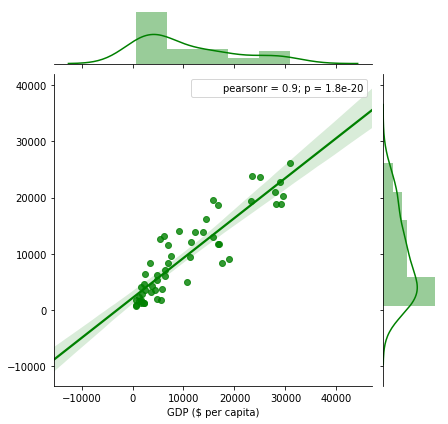

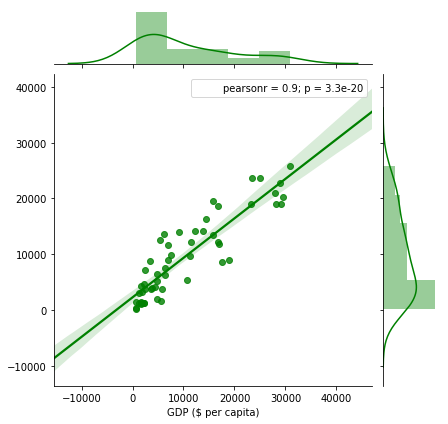

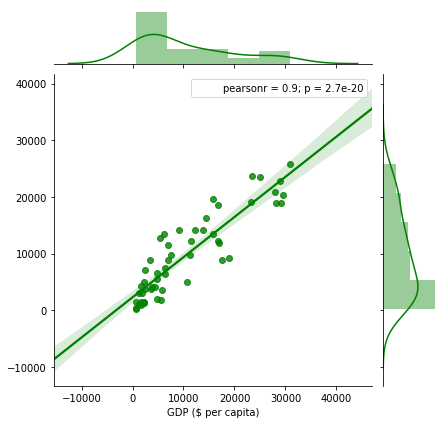

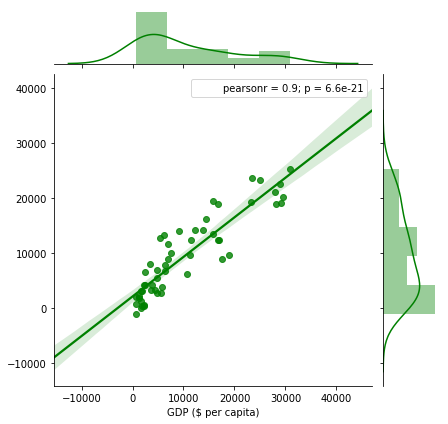

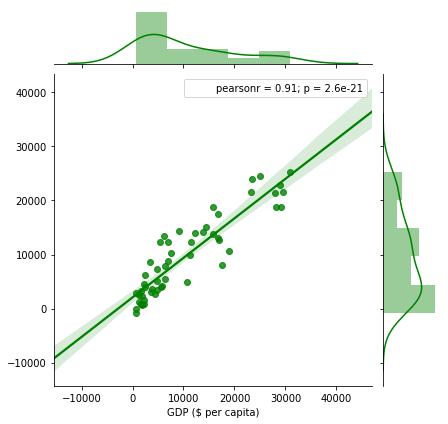

In [103]:
for item in useful_cols:
    print("Selected Columns: ", selected_cols)
    train_test_rmse(new_countries,selected_cols)
    selected_cols.append(item)